In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
26,230 cases (7 day average) as of Thu 23 Sep, +891.4 since Wed 22 Sep
567 hospitalised (7 day average) as of Sun 26 Sep, -22.1 since Wed 22 Sep
93 died (7 day average) as of Thu 23 Sep, -1.7 since Wed 22 Sep


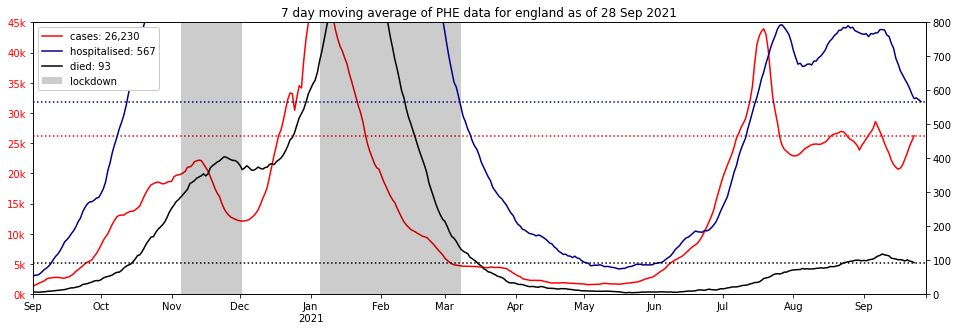

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

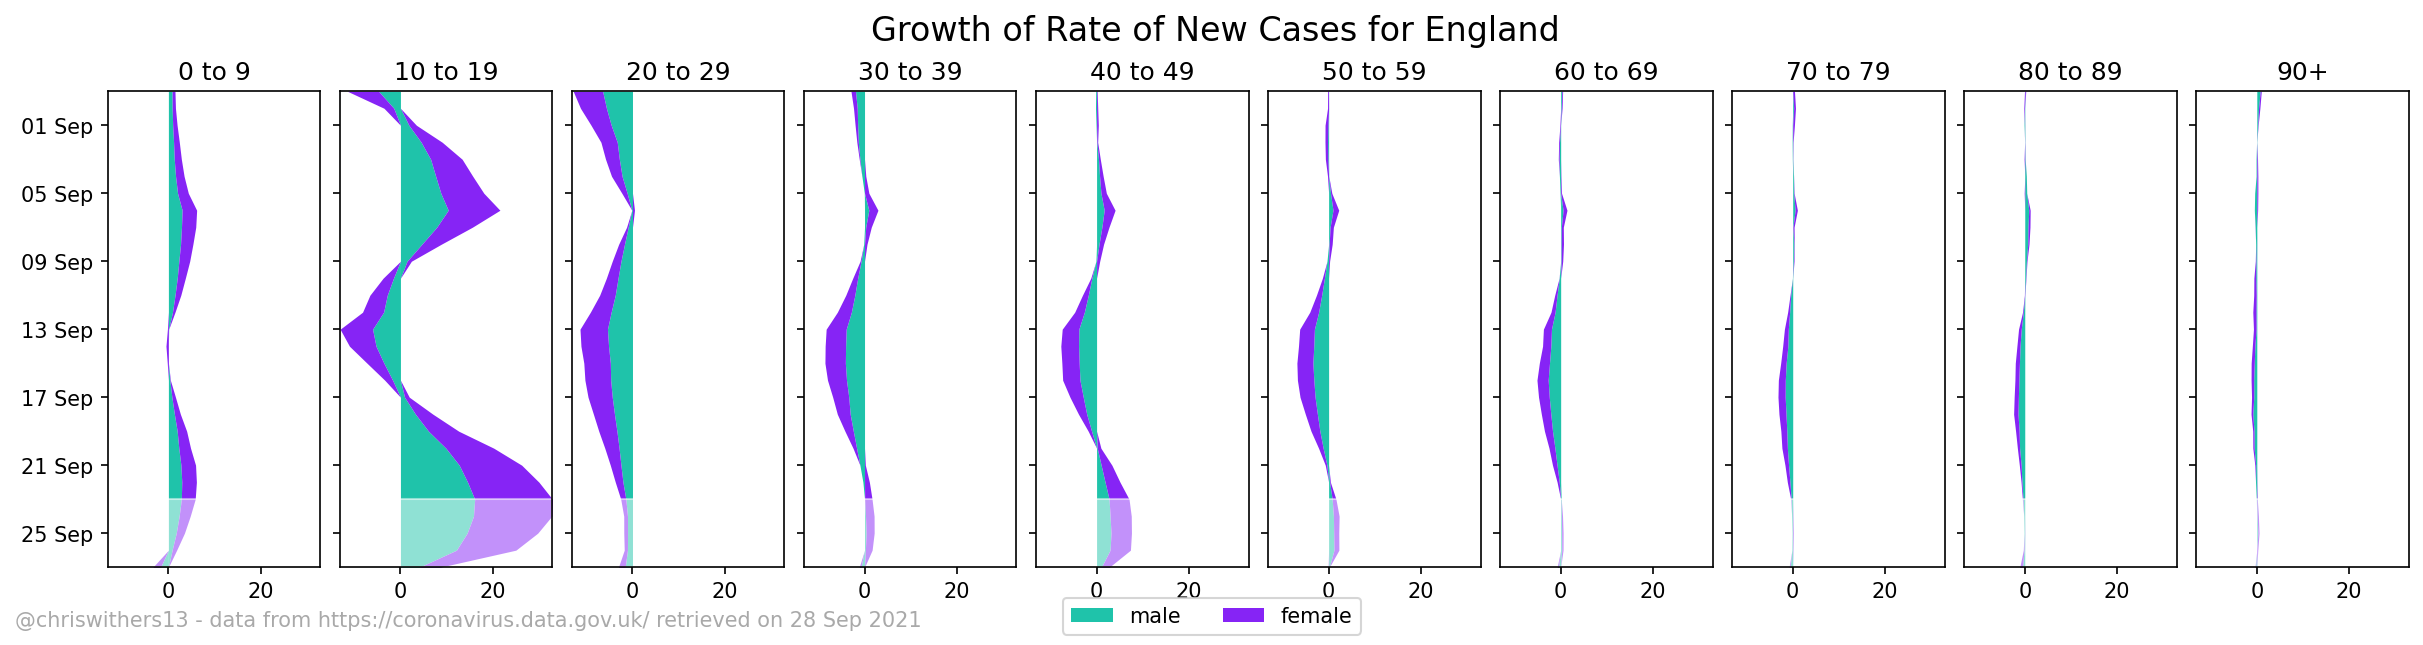

In [4]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

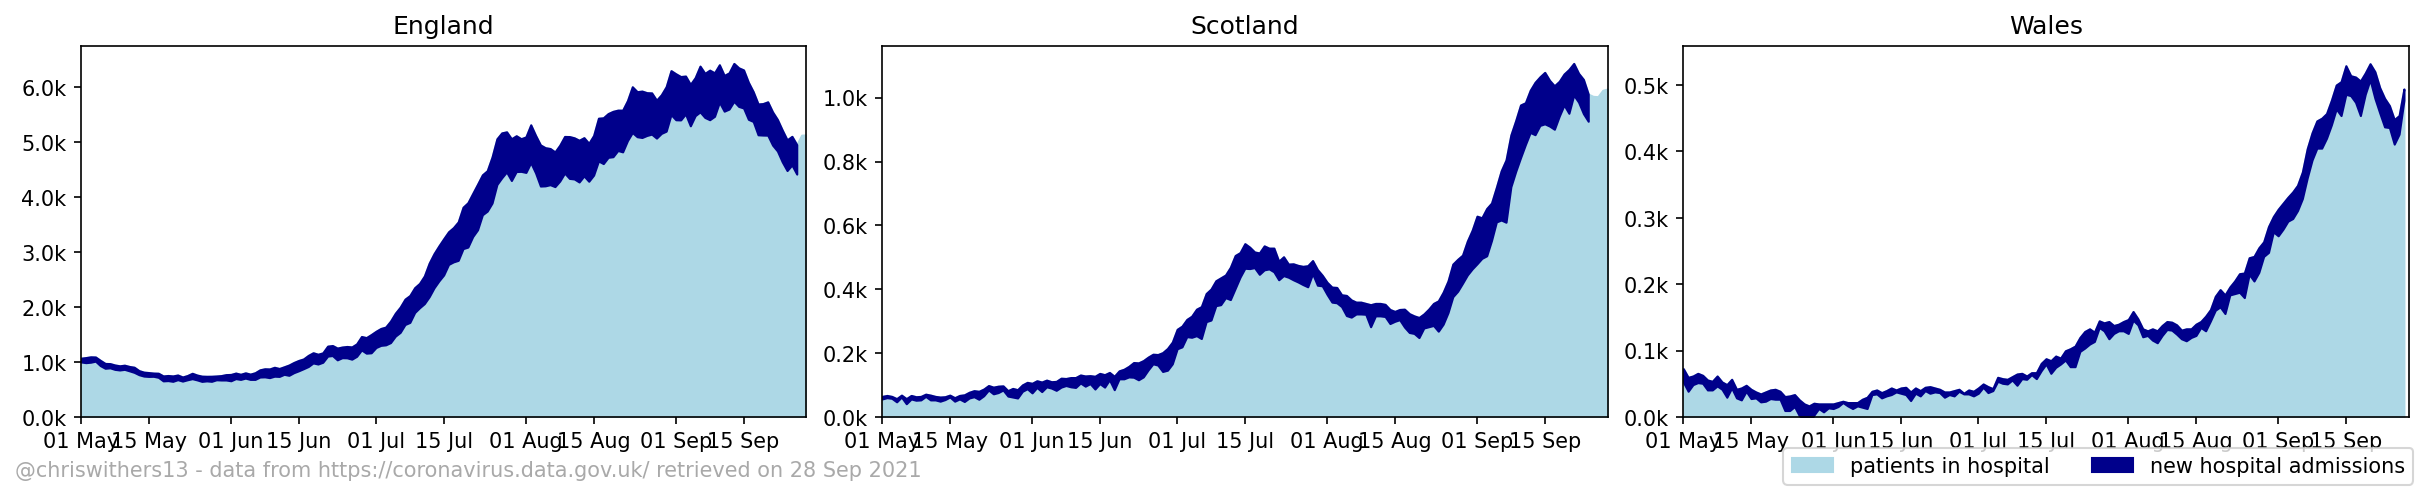

In [5]:
hospital_plot(start='2021-05', figsize=(16,3), figs=(1, 3))

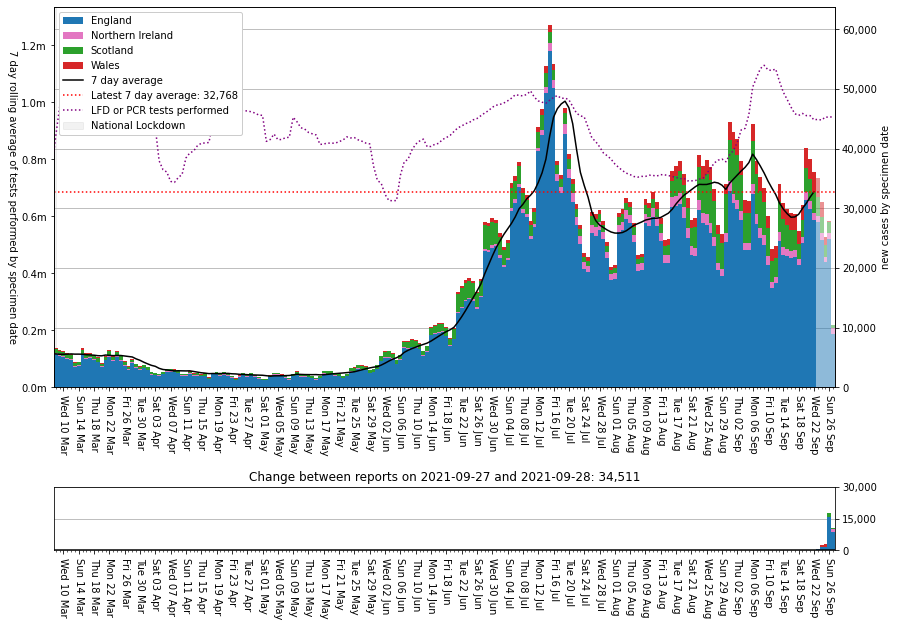

In [6]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

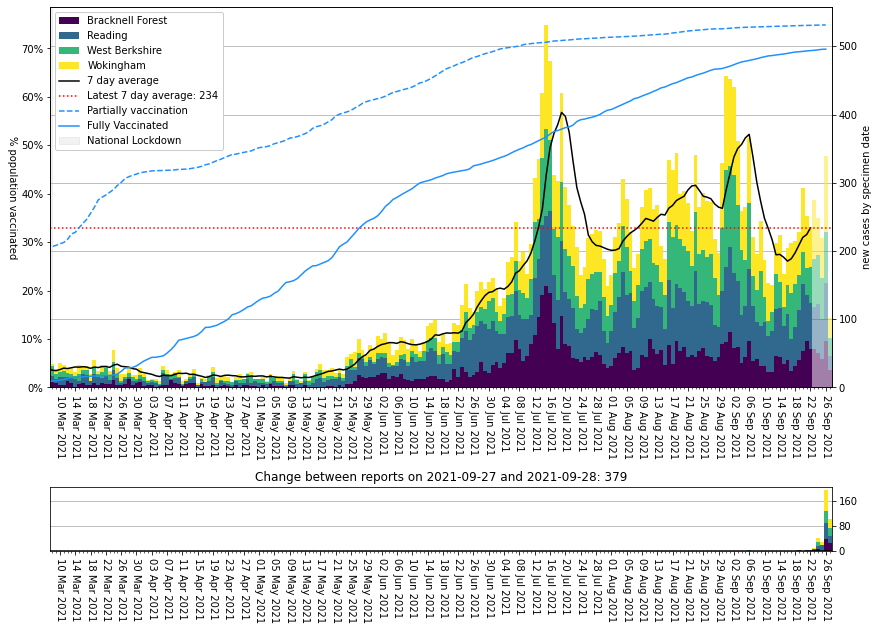

In [7]:
plot_areas(for_date, areas=my_areas, lines=population_vaccinated)

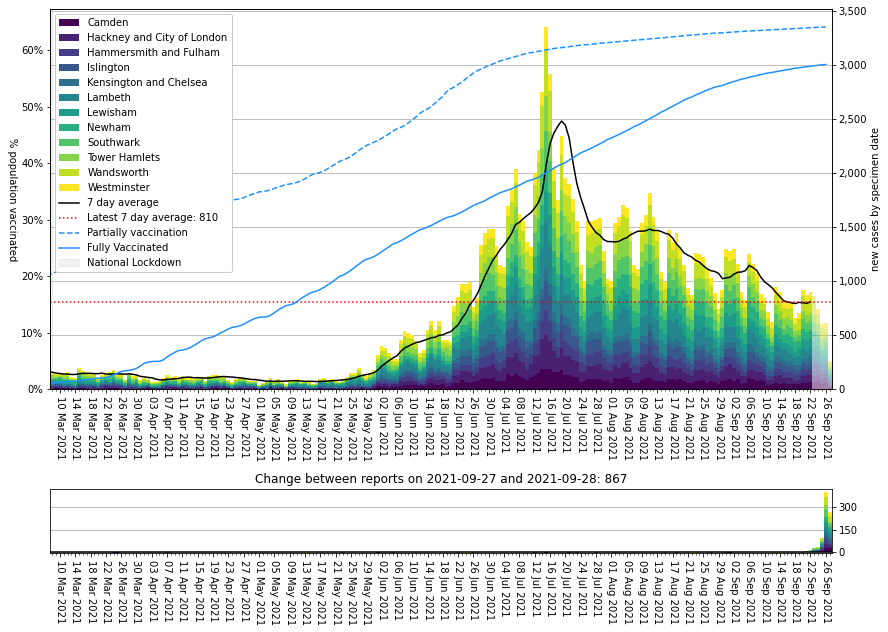

In [8]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                    
E07000153           Kettering          881.347272                   897.0   
E07000220               Rugby          642.585028                   700.0   
W06000012   Neath Port Talbot          621.707428                   891.0   
E07000197            Stafford          610.431235                   838.0   
E07000026           Allerdale          607.604259                   594.0   
E07000150               Corby          602.342906                   435.0   
E06000013  North Lincolnshire          584.472872                  1007.0   
W06000016   Rhondda Cynon Taf          584.422044                  1410.0   
W06000018          Caerphilly          583.736021                  1057.0   
E08000016            Barnsley          575.615921                  1421.0   

          Specimen date  
areaCode                 
E07000153    2021-09-27  
E07000220    2021-09-27  
W06000012    2021-09-26  
E07000197    2021-09-27  
E07000026    2021-09-27  
E07000150    2021-09-27  
E06000013    2021-09-27  
W06000016    2021-09-26  
W06000018    2021-09-26  
E08000016    2021-09-27

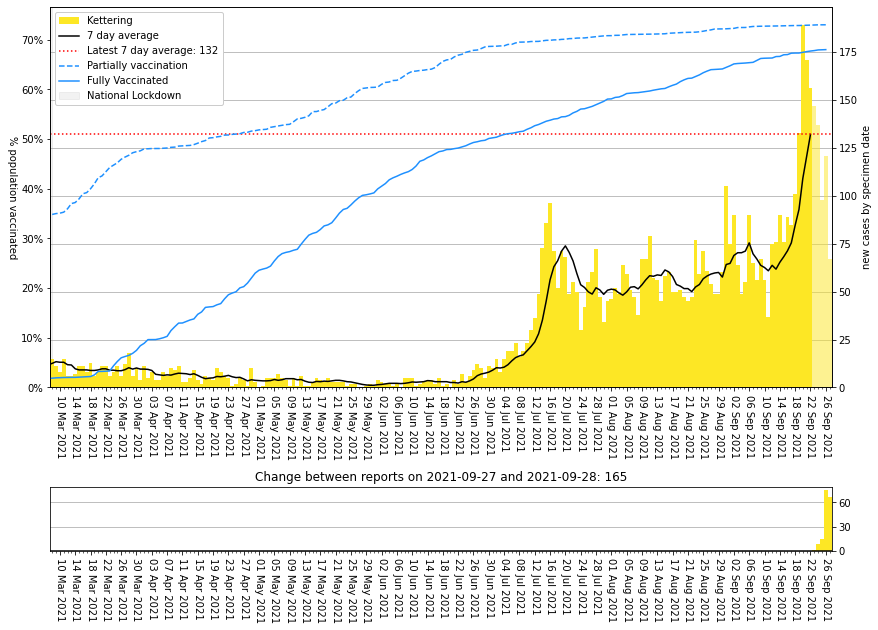

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                      
E08000035                         Leeds          318.103132   
E08000025                    Birmingham          214.482894   
S12000049                  Glasgow City          310.051807   
E06000047                 County Durham          352.767622   
E08000032                      Bradford          338.103213   
E06000052  Cornwall and Isles of Scilly          316.368253   
E08000034                      Kirklees          401.330644   
E06000054                     Wiltshire          339.783690   
E08000019                     Sheffield          282.806107   
E06000049                 Cheshire East          395.676711   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000035                  2523.0    2021-09-27  
E08000025                  2449.0    2021-09-27  
S12000049                  1963.0    2021-09-27  
E06000047                  1870.0    2021-09-27  
E08000032                  1825.0    2021-09-27  
E06000052                  1809.0    2021-09-27  
E08000034                  1765.0    2021-09-27  
E06000054                  1699.0    2021-09-27  
E08000019                  1654.0    2021-09-27  
E06000049                  1520.0    2021-09-27

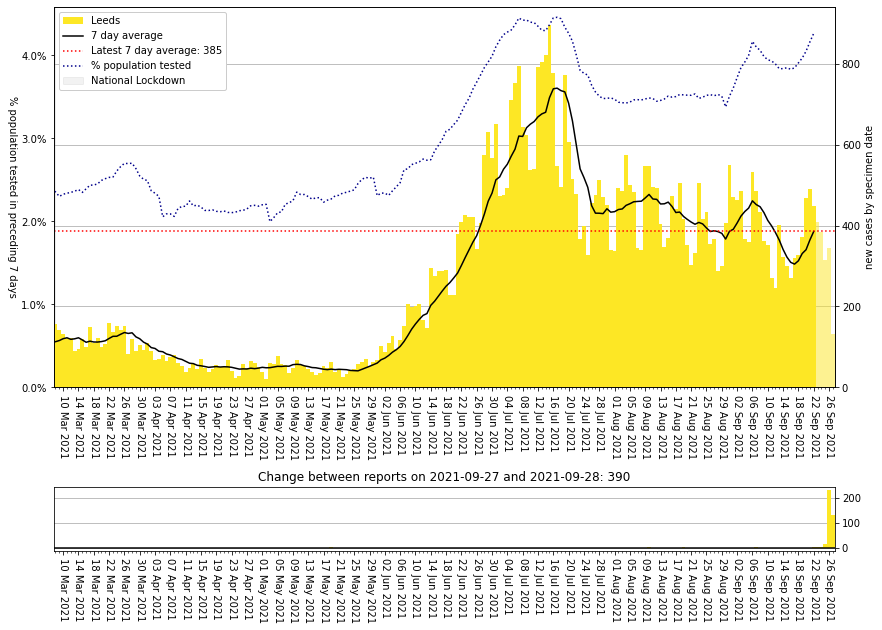

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

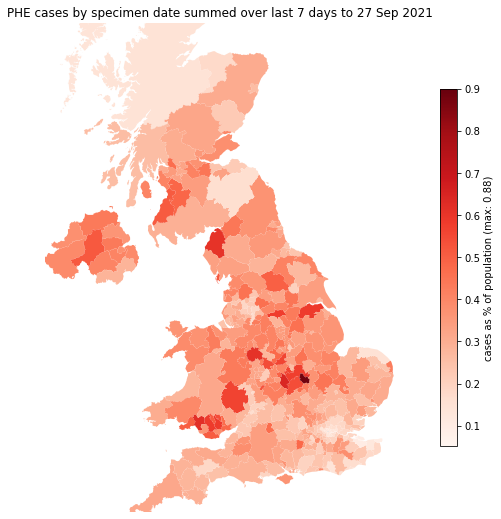

Loading BokehJS ...

In [14]:
summed_maps(for_date, vmax=0.9)

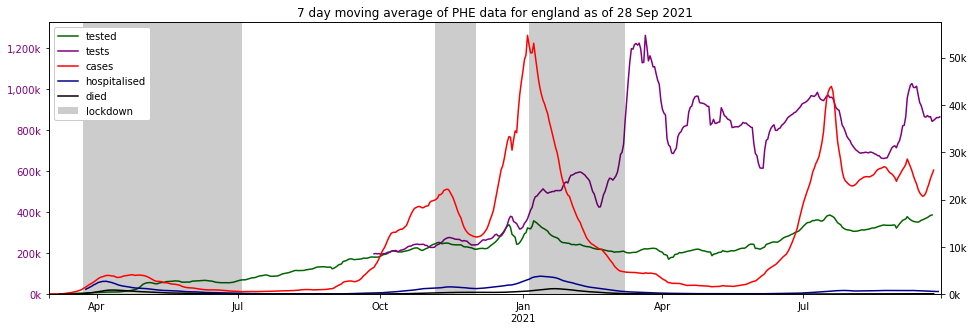

In [15]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

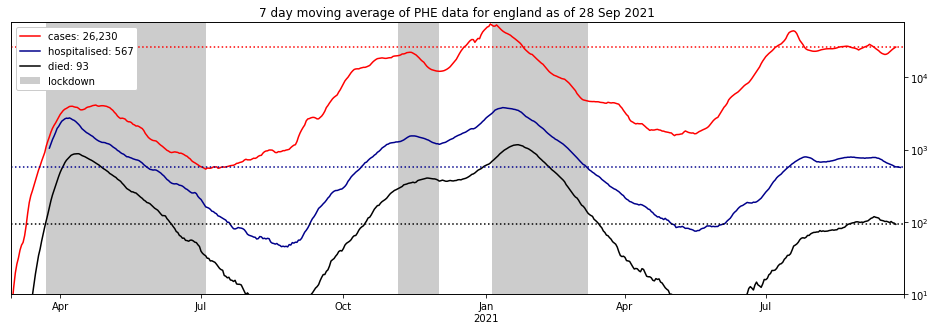

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [17]:
vaccination_changes()

areaName   areaCode        full         any    partial  population  \
0           England  E92000001  37539476.0  40894475.0  3354999.0    56286961   
1  Northern Ireland  N92000002   1206162.0   1311183.0   105021.0     1893667   
2          Scotland  S92000003   3832498.0   4184574.0   352076.0     5463300   
3             Wales  W92000004   2221612.0   2375494.0   153882.0     3152879   

    full_pct  partial_pct   none_pct  
0  66.693023     5.960526  27.346451  
1  63.694514     5.545906  30.759579  
2  70.149873     6.444383  23.405744  
3  70.462964     4.880682  24.656354

'partial: 48,765,726 (73.0%), full: 44,799,748'

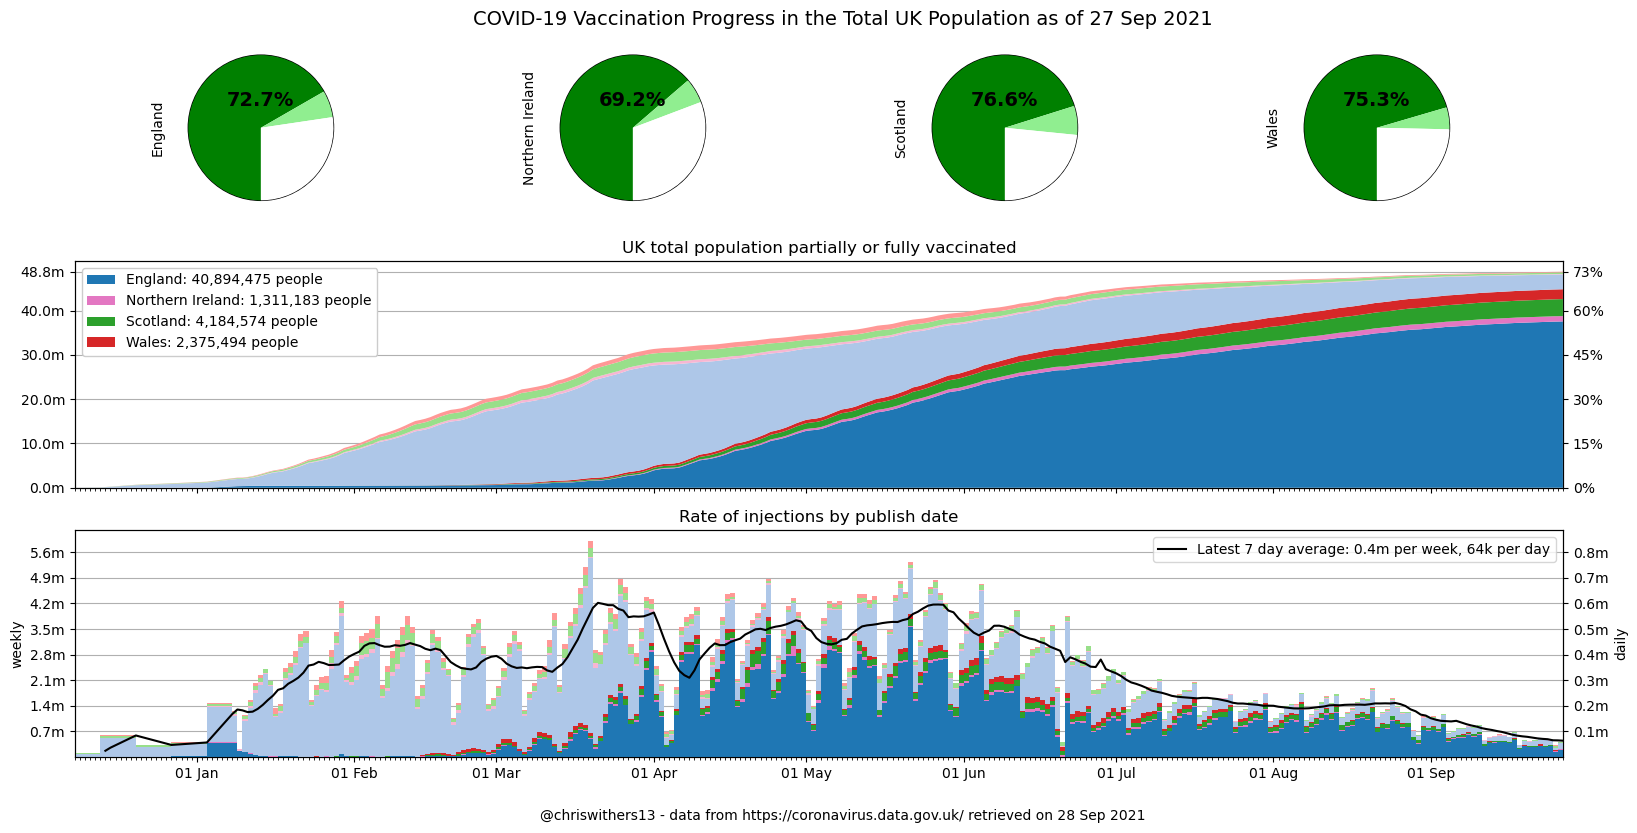

In [18]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")